## Predicting the Sale Price of a house 

This is one of my earliest projects involving a machine learning model, specifically Linear Regression.

### Why Linear Regression
Linear regression is a popular machine learning model used for predicting numerical outcomes. In the context of predicting house prices, linear regression aims to establish a linear relationship between input features (such as square footage, number of bedrooms, location, etc.) and the target variable (house price).

The fundamental idea is to find the best-fitting line that minimizes the difference between the predicted values and the actual prices. This line is represented by a linear equation, where each input feature is assigned a weight, and the sum of these weighted features plus a constant term gives the predicted house price.

In summary, linear regression is chosen for predicting house prices due to its simplicity, interpretability, and effectiveness in capturing linear relationships between input features and the target variable.

### Goal: 
Try to predict the price of each houses in Ames by choosing the best parameter for our linear regression model

### Get to know more about the data

The data set includes around 2930 records of house sales in Ames, Iowa between 2006 – 2010 and contains 81 explanatory features (4 categorical value detailing various aspects of residential homes such as square footage, number of rooms and sale condition. The data is split equally into a training set, which will be used to create the model and a test set, which will be used to test model performance. The general workflow to create the model will be as follows:

1. Data Collection
2. Exploratory Data Analysis (EDA) & Visualization
3. Impute Missing Values and Clean Data
4. Handling Outlier
5. Feature Engineering
6. Modeling and Predictions

### Import the important packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Collection

Lets try to load our data

In [2]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [4]:
df.shape

(2930, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### 2. Exploratory Data Analysis (EDA) & Data Visualization

Let us check our SalePrice value, are there any outlier value

<Axes: >

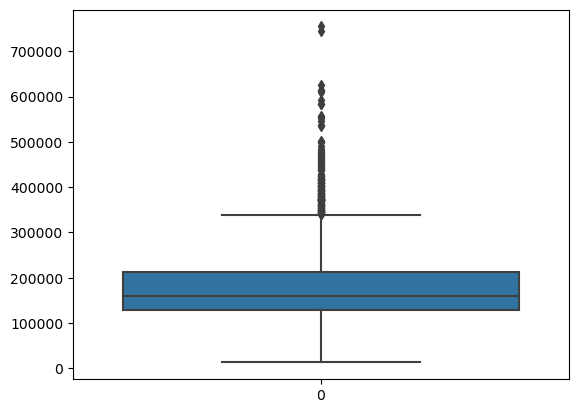

In [6]:
sns.boxplot(data = df['SalePrice'])

In [7]:
q25, q75= np.percentile(df['SalePrice'], [25,75])
IQR = q75-q25
higher_limit = q75 + 1.5*IQR
higher_limit

339500.0

In [8]:
len(df[df['SalePrice']>339500])

137

It turned out that there might be around 137 outliers out of 2930 data (4.7% data). But first, lets dive deeper into our data

Lets check the correlation of each feature to our label 'SalePrice'

In [9]:
df.corr()['SalePrice'].sort_values(ascending = False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14844\2749516656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values(ascending = False)


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

Now lets try to do scatterplot to see the outlier existence, we will do with some of the features that have the biggest correlation

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

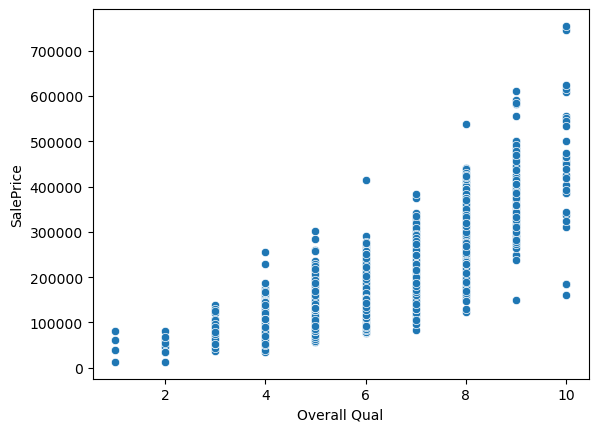

In [10]:
sns.scatterplot(data=df, x='Overall Qual', y= 'SalePrice')

### 3. Handling Outliers

We can see that there is a postive correlation between SalePrice and Overall Quality, with a few outliers

In [11]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


We found that these 4 data were a bit suspicious because it is almost impossible to have a high overall quality but the price is cheaper compare to other houses with poorer quality, but lets try find another feature that is really showing us outlier data points

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

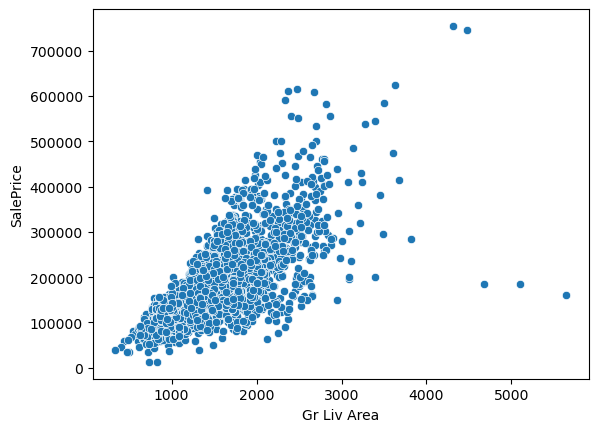

In [12]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [13]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Look, we find another outliers. We can see that these 3 data are the suspicious one, because usually the larger living area equals to higher sale price. To improve our model, we will remove these outliers.

In [14]:
df = df[~((df['Gr Liv Area']>4000) & (df['SalePrice']<300000))]
df.shape

(2927, 81)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

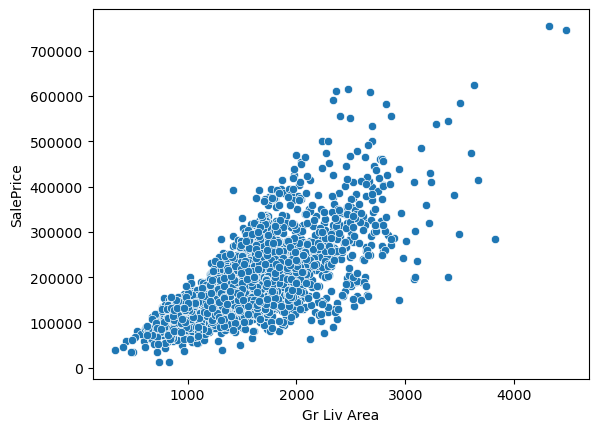

In [15]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

From the scatterplot we actually saw another 2 outliers which have a high SalePrice and a large GV Liv Area, but because these data still make sense, for now we will leave as it is.


### 3. Impute Missing Values and Clean Data


In [16]:
# with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f:
#    print(f.read())

In [17]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Because PID column is only a nominal column that show us the ID and doesnt give us more value for our data, so we will drop it. 

In [18]:
df = df.drop('PID', axis=1)

In [19]:
len(df.columns)

80

Now, we left with 89 columns (79 features and 1 label)

Lets check the percentage of our missing values

In [20]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan
    

In [21]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

Lets Visualize it

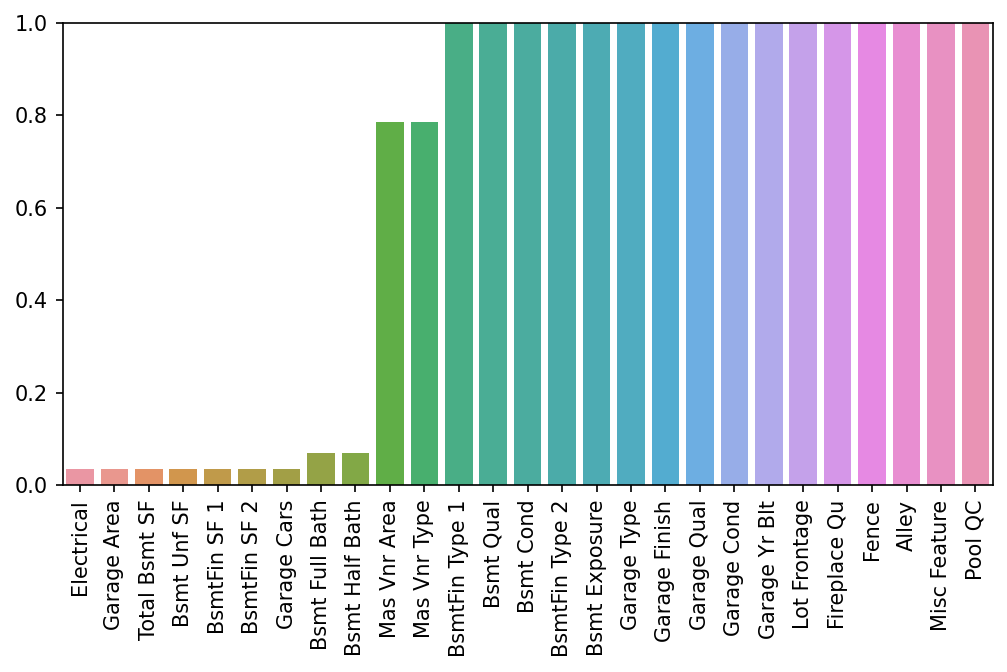

In [22]:
plt.figure(figsize=(8,4), dpi = 150)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1);

In [23]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

We can that we only have 11 columns that contain missing values that are less that 1%

Now, lets check this data one by one whether we will drop this data or try to fill the data

In [24]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [25]:
#Here we drop 2 rows, 1 missing row from the missing value in Electrical
#The other row is the missing value in Garage Area
df = df.dropna(axis = 0, subset = ['Electrical', 'Garage Area'])


In [26]:
# we have reducedit from 11 features to 8 features
percent_nan = percent_missing(df)
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

Now lets check again on these features

In [27]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [28]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [29]:
df[df['BsmtFin SF 2'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [30]:
df[df['BsmtFin SF 1'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [31]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


This is interesting, the row has a lot of null values for feature that has the 'bmst'. If we check on the description for all of the features, this might be because the house itself doesnt have basement and this is why it was left null

Lets try to check on all features that has something to do with bsmt

#### Filling in the null data

We filled in data based on column names. There are 2 types of basement features, numerical ('BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath') and string descriptives('Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'). For basement feature with numerical value, we filled it with '0' and the one that has string value was filled with 'None'.


In [32]:
#bsmt numeric values -> fillna 0 

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [33]:
#bsmt numeric values -> fillna None

bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [34]:
percent_nan = percent_missing(df)
percent_nan[percent_nan<1]


Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

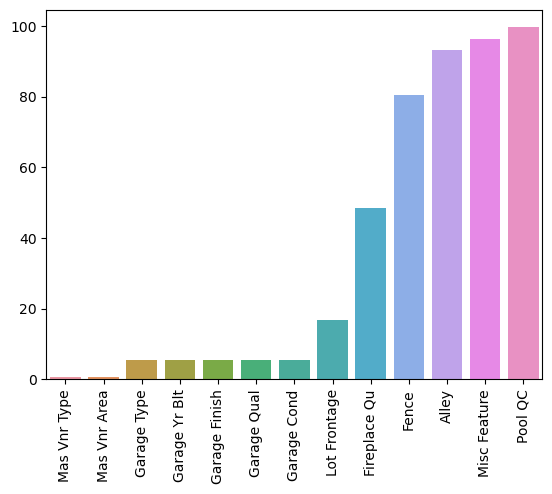

In [35]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

we only left with 2 feature that has less than 1% missing

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before with the basement features.

In [36]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [37]:
percent_nan = percent_missing(df)
percent_nan[percent_nan<1]

Series([], dtype: float64)

Now, we dont have any missing values under 1% anymore

Fill ini missing data from garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.


In [38]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [39]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

Now for the garage year, because it was null value, lets just fill it with 0 

In [40]:
#fill the garage year built that is Nan as 0
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [41]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

We saw that we still have 6 total columns left, but there were 4 columns that have >80% null values. Because it will be impossible to try to guess it and fill the value, we decided to drop those columns

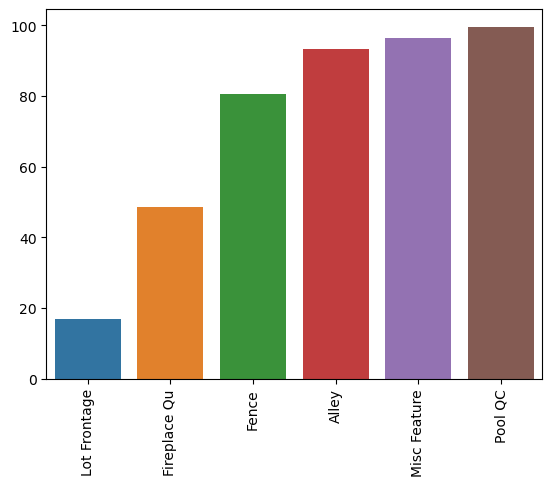

In [42]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
#Now there are anly 6 columns left

We will try to drop 4 columns that are missing 80% of the data

#### Dropping Columns

In [43]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [44]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

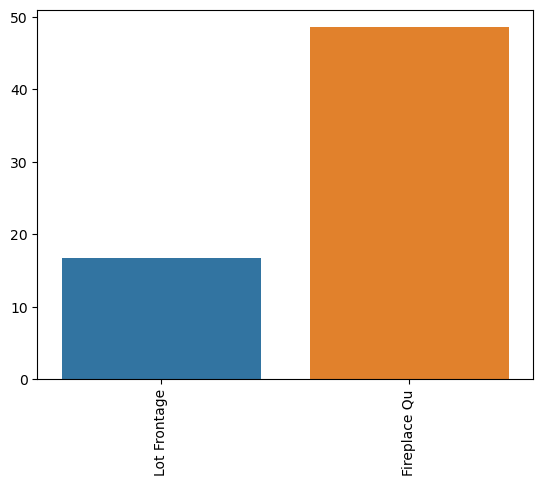

In [45]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
#Now we are left with 2 columns

Now, we are left with only 2 columns

We are checking on the value for fireplace, and we found that fireplace is categorical. So, we will try to fill in the missing value with None

In [46]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [47]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [48]:
percent_nan = percent_missing(df)
percent_nan
#We only have one column left

Lot Frontage    16.752137
dtype: float64

Lets try to check on all the values availailable in 'Lot Frontage' column

In [49]:
df['Lot Frontage'].unique()

array([141.,  80.,  81.,  93.,  74.,  78.,  41.,  43.,  39.,  60.,  75.,
        nan,  63.,  85.,  47., 152.,  88., 140., 105.,  65.,  70.,  26.,
        21.,  53.,  24., 102.,  98.,  83.,  94.,  95.,  90.,  79., 100.,
        44., 110.,  61.,  36.,  67., 108.,  59.,  92.,  58.,  56.,  73.,
        72.,  84.,  76.,  50.,  55.,  68., 107.,  25.,  30.,  57.,  40.,
        77., 120., 137.,  87., 119.,  64.,  96.,  71.,  69.,  52.,  51.,
        54.,  86., 124.,  82.,  38.,  48.,  89.,  66.,  45.,  35., 129.,
        31.,  42.,  28.,  99., 104.,  97., 103.,  34., 117., 149., 122.,
        62., 174., 106., 112.,  32., 115., 128.,  91.,  33., 121., 144.,
       130., 109., 150., 113., 125., 101.,  46., 114., 135., 136.,  37.,
        22., 313.,  49., 123., 160., 195., 118., 134., 182., 116., 138.,
       155., 126., 200., 168., 111., 131., 153., 133.])

### Feature Engineering

From the description of the data, we know that:
    
Neighborhood: Physical locations within Ames city limits
LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

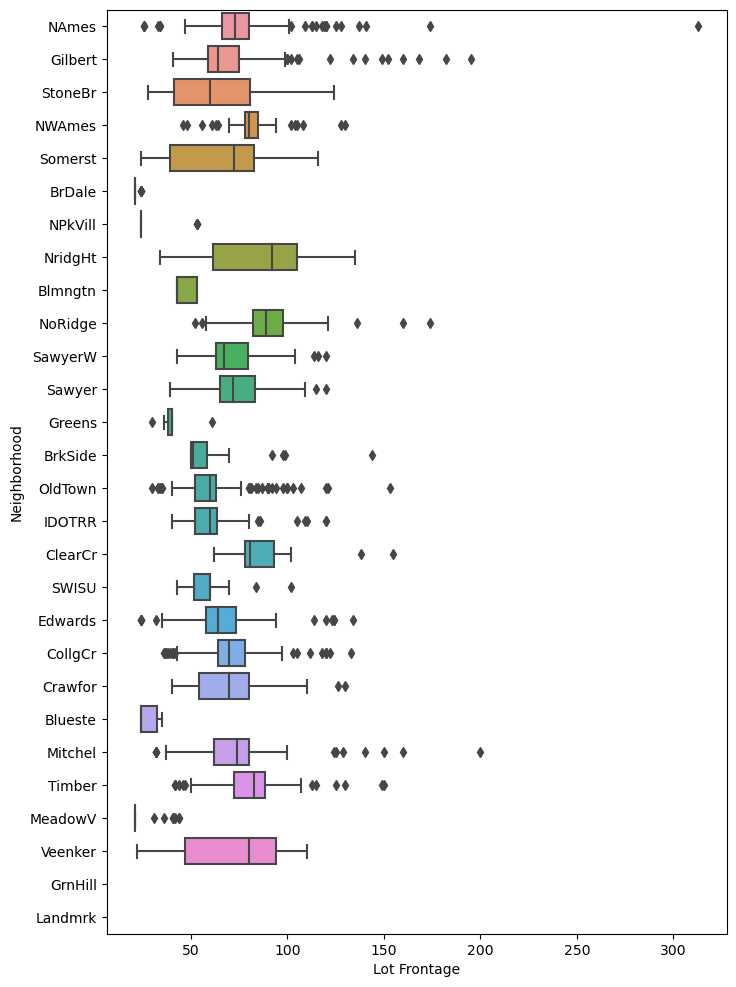

In [50]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [51]:
df[df['Lot Frontage'].isnull()]
#So there are around 490 data pf Lot Frontage that are null

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2897,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2898,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2912,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [52]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

Lets fill in the null value with the mean value of Lot Frontage per neighborhood

I have tried to fill the Null values using SimpleImputer but it always didnt work, so right now i will use a simple groupby and transform to fill na

In [53]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))


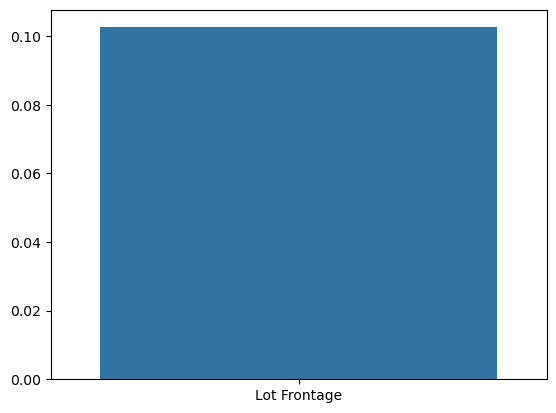

In [54]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan);

In [55]:
# We saw that there are still 3 null values left, because of that we will fill it with 0

df['Lot Frontage'].isnull().sum()

3

In [56]:
df['Lot Frontage'].fillna(0, inplace= True)

Great! now we dont have any missing values left. 

#### Dealing with categorical data with One Hot Encoding

Lets check our data and the description again


In [57]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [58]:
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

From the description above, we can see that 'MSSubClass' column was identify with numerical but it wass actually categorical with no ordinal value

In [59]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [60]:
df['MS SubClass'].dtypes

dtype('O')

Now let us select all of the column with object datatype

In [61]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qu

We need to split our data between the numerical and categorical values. For our categorical values, in order for it to get into the modeling phase, it need to be turned to numerical/binary value using the get_dummies function from pandas. This was because the model could not understand if it were some string value.

In [62]:
my_object_df = df.select_dtypes(include='object')

In [63]:
my_numeric_df = df.select_dtypes(exclude='object')

In [64]:
df_object_dummies = pd.get_dummies(my_object_df, drop_first=True)

In [65]:
df_object_dummies
# and now it create 238 columns 

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


It gave us 2925 rows and 238 columns.

The next step was to combine our categorical and numerical data into one dataframe.

In [66]:
final_df = pd.concat([my_numeric_df, df_object_dummies], axis = 1)
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


We don't know if 274 columns is very useful. More columns doesn't necessarily lead to better results. In fact, we may want to further remove columns (or later on use a model with regularization to choose important columns for us)

In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(238)
memory usage: 1.5 MB


From the info we can see that now we dont have any null value, all we have is 2925 non-null rows/column

### Modeling and Predictions

First, we will split the data X for all of the independent variable and y for the dependent variable which is SalePrice

In [68]:
X = final_df.drop('SalePrice', axis=1)
y = final_df['SalePrice']

We will split our feature data into two sections: 90% for training and 10% for testing. The reason for choosing a smaller percentage for our test set is because we utilize GridSearchCV, which performs cross-validation up to 5 times. During each cross-validation iteration, the 90% training data is further split into 5 sections, and in each iteration, one of these sections is used as a validation set while the model is trained on the rest. This process is repeated five times, rotating through each section as the validation set. The test set, on the other hand, remains untouched during cross-validation and is primarily used for evaluating the model's performance after the hyperparameter tuning process. The final score is then computed based on the mean of the scores obtained in each cross-validation fold.

In [69]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [71]:
#Scale Data
from sklearn.preprocessing import StandardScaler


In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We will use gridsearch to choose the best parameter

In [74]:
from sklearn.linear_model import ElasticNet

In [75]:
base_elastic_model = ElasticNet(max_iter = 1000_000)

In [76]:
param_grid = {'alpha':[0.1,1,5,50,100], 
              'l1_ratio':[0.1,0.5,0.7,0.9,0.95,0.99,1]}

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
grid_model = GridSearchCV(estimator = base_elastic_model,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv=5,
                         verbose=1)

In [79]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [80]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1, max_iter=1000000)

In [81]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

Now, after we find the best parameter, we are ready fo create our predictions

In [82]:
y_pred = grid_model.predict(X_test)

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In regression analysis, the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are commonly employed metrics to evaluate predictive model performance. MAE calculates the average absolute differences between predicted and actual values, offering a straightforward measure of the average magnitude of errors. On the other hand, RMSE provides a similar evaluation but gives more weight to larger errors by taking the square root of the average of squared differences. Using both metrics provides a comprehensive understanding of the model's accuracy, considering different aspects such as the average error magnitude and sensitivity to larger errors. While MAE is more interpretable and less sensitive to outliers, RMSE offers insights into the spread of errors and may be preferred in cases where larger errors are considered more significant. Overall, employing both MAE and RMSE contributes to a thorough assessment of regression model performance, accommodating diverse considerations based on specific problem characteristics.

In [94]:
print(f" The Mean Absolute Error Percentage {mean_absolute_error(y_test, y_pred)} -- {round(mean_absolute_error(y_test, y_pred) / final_df['SalePrice'].mean()*100,2)}%") 

 The Mean Absolute Error Percentage 14195.354900562172 -- 7.85%


In [96]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE
print(f" The Root Mean Sqared Error Percentage {RMSE} -- {round(RMSE / final_df['SalePrice'].mean()*100,2)}%") 

 The Root Mean Sqared Error Percentage 20558.508566893175 -- 11.37%


In [88]:
14195.354900562172/180815.53743589742

0.0785073843866692

In [97]:
final_df['SalePrice'].mean()*100

18081553.743589744

### Conclusion

The linear regression model, with optimized parameters alpha 100 and l1_ratio 1, serves as a valuable tool for real estate asset pricing. By inputting house characteristics, the model generates accurate price predictions. This information is crucial for business decisions and offers insights into the relative value of different house features for potential buyers.

The model's performance metrics reveal a Mean Absolute Error (MAE) percentage of approximately 7.85% and a Root Mean Squared Error (RMSE) percentage of approximately 11.37%. These metrics indicate the average percentage difference between predicted and actual house prices. Given a mean house price of $18,081,553.74, it's essential to interpret these percentages in the context of the scale of house prices. Lower percentages signify better model performance.

To further enhance predictive accuracy, a comprehensive analysis of the results is recommended. This may involve exploring feature engineering, fine-tuning the model, or experimenting with alternative machine learning algorithms. Continuous refinement is key to achieving optimal model performance.

---
---
### Next Improvement:

1.  Explore additional features or transformations of existing features that could enhance the model's predictive power.
2.  Experiment with different machine learning models such as decision trees, random forests, or gradient boosting algorithms.
3. Understand which features contribute the most to the predictions. Eliminate irrelevant or highly correlated features that might introduce noise.